In [2]:
# Importing pandas
import pandas as pd

# Importing matplotlib
import matplotlib.pyplot as plt

# Reading in current data from coinmarketcap.com
current = pd.read_csv("coinmarket.csv")

# Printing out the first few lines
current.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [3]:
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = current[['id', 'market_cap_usd']]

# Counting the number of values
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [4]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

Text(0, 0.5, 'Percentage of total cap')

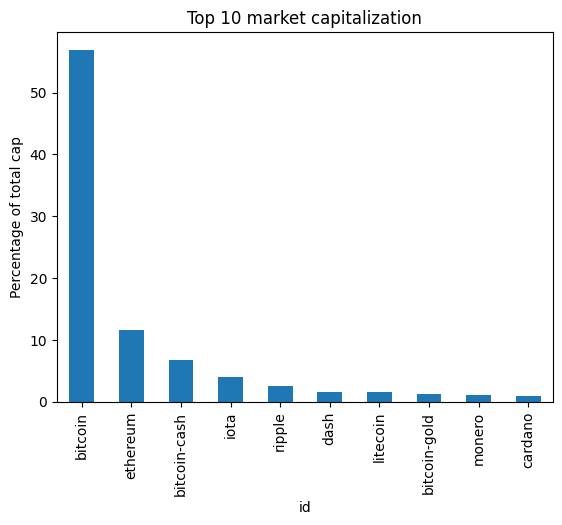

In [17]:
# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index("id")

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd/cap.market_cap_usd.sum()) * 100)

# Plotting the barplot with the title defined above 
ax = cap10.market_cap_perc.head(10).plot.bar(title= 'Top 10 market capitalization')

# Annotating the y axis with the label defined above
ax.set_ylabel('% of total cap')

In [20]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = current[['id', 'percent_change_1h','percent_change_24h', 'percent_change_7d',]]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_1h', ascending = True)

# Checking the first few rows
volatility.head()

,percent_change_1h,percent_change_24h,percent_change_7d
id,,,
force,-70.85,-15.05,283.37
bitok,-62.80,-74.37,-71.67
wyvern,-49.43,6.31,23.14
halloween-coin,-47.13,6.27,-29.79
cagecoin,-39.38,-36.26,-92.68


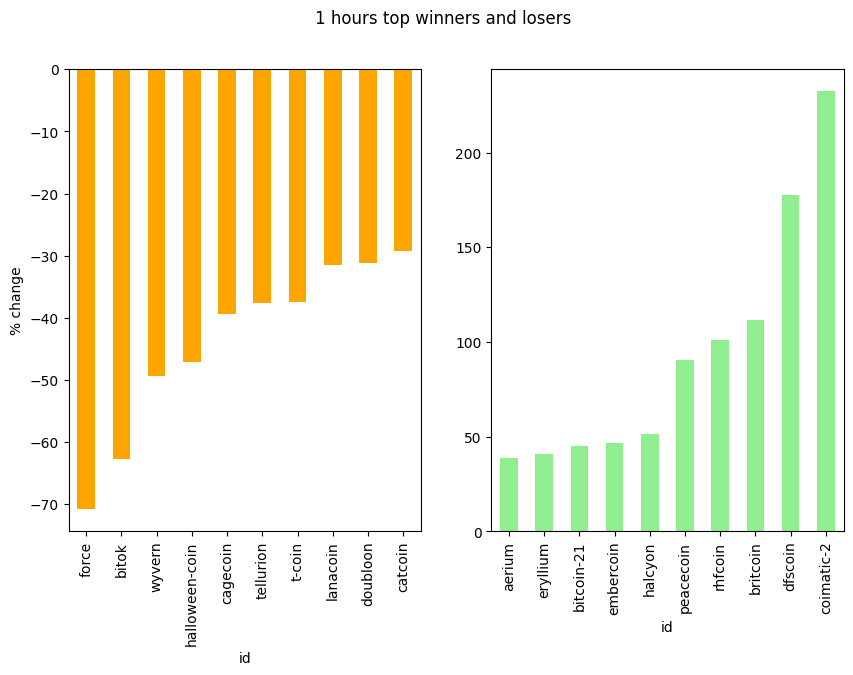

In [21]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))    
    # Plotting with pandas the barchart for the top 10 losers
    ax = (volatility_series[:10].plot.bar(color = 'orange', ax = axes[0]))   
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    # Setting the ylabel to '% change'
     ax.set_ylabel('% change')
    # Same as above, but for the top 10 winners
    ax = (volatility_series[-10:].plot.bar(color = 'lightgreen', ax = axes[1]))  
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "1 hour top winners and losers"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.percent_change_1h, DTITLE)

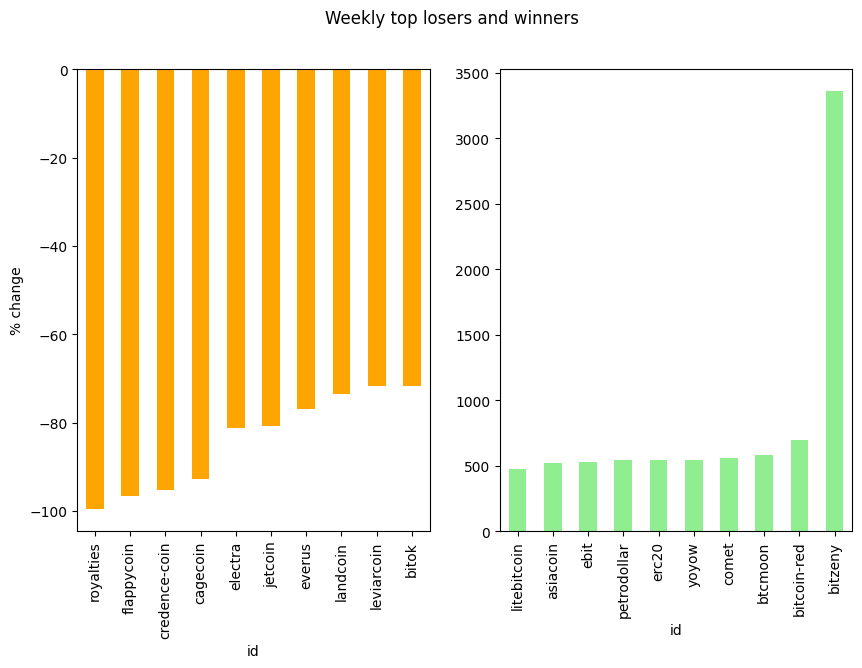

In [22]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d', ascending = True)

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

In [11]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query('market_cap_usd > 10000000000')

# Printing out largecaps
# ... YOUR CODE FOR TASK 9 ...
largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


<BarContainer object of 3 artists>

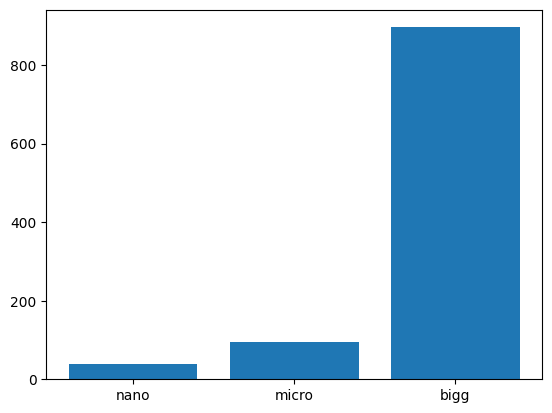

In [25]:
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["nano", "micro","bigg"]

# Using capcount count the biggish cryptos
bigg = capcount('market_cap_usd > 300000000')

# Same as above for micro ...
micro = capcount('market_cap_usd > 50000000 & market_cap_usd < 300000000')

# ... and for nano
nano =  capcount('market_cap_usd < 50000000')

# Making a list with the 3 counts
values = (bigg, micro, nano)

# Plotting them with matplotlib 
# ... YOUR CODE FOR TASK 10 ...
plt.bar(range(len(values)), values, tick_label = LABELS)